In [ ]:
# Install the necessary packages
%pip install pandas_profiling
%pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import required packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import ydata_profiling as pp
import seaborn as sns 

In [ ]:
# Read the dataset
df = pd.read_csv("data (1).csv")

In [ ]:
# Check the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [ ]:
# Get descriptive statistics of the dataframe
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
# Generate the profiling report of the dataframe
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# First 5 rows of the dataframe
df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [ ]:
 # Replace the categorical features with numerical values
    
 df['checking_status'] = df['checking_status'].replace({
     '<0': 1,
     '0<=X<200': 2,
     '>=200': 3,
     'no checking': 4
 })

 df['credit_history'] = df['credit_history'].replace({
     'no credits/all paid': 0,
     'all paid': 1,
     'existing paid': 2,
     'delayed previously': 3,
     'critical/other existing credit': 4
 })

 df['purpose'] = df['purpose'].replace({
     'new car': 0,
     'used car': 1,
     'furniture/equipment': 2,
     'radio/tv': 3,
     'domestic appliance': 4,
     'repairs': 5,
     'education': 6,
     'other': 7,
     'retraining': 8,
     'business': 9
 })

 df['savings_status'] = df['savings_status'].replace({
     '<100': 1,
     '100<=X<500': 2,
     '500<=X<1000': 3,
     '>=1000': 4,
     'no known savings': 5
 })

 df['employment'] = df['employment'].replace({
     'unemployed': 1,
     '<1': 2,
     '1<=X<4': 3,
     '4<=X<7': 4,
     '>=7': 5
 })

 df['personal_status'] = df['personal_status'].replace({
     'male div/sep': 1,
     'female div/dep/mar': 2,
     'male single': 3,
     'male mar/wid': 4
 })

 df['other_parties'] = df['other_parties'].replace({
     'none': 1,
     'co applicant': 2,
     'guarantor': 3
 })

 df['property_magnitude'] = df['property_magnitude'].replace({
     'real estate': 1,
     'life insurance': 2,
     'car': 3,
     'no known property': 4
 })

 df['other_payment_plans'] = df['other_payment_plans'].replace({
     'bank': 1,
     'stores': 2,
     'none': 3
 })

 df['housing'] = df['housing'].replace({
     'rent': 1,
     'own': 2,
     'for free': 3
 })

 df['job'] = df['job'].replace({
     'unemp/unskilled non res': 1,
     'unskilled resident': 2,
     'skilled': 3,
     'high qualif/self emp/mgmt': 4
 })

 df['foreign_worker'] = df['foreign_worker'].replace({
     'yes': 1,
     'no': 2
 })

 df['class'] = df['class'].replace({
     'good': 1,
     'bad': 2
 })

 df["own_telephone"] = df["own_telephone"].replace({
     'yes': 2, 
     'none': 1
 })


In [ ]:
# Read the new dataset

df = pd.read_csv("data2.csv")

# Drop 'duration' and 'property_magnitude' columns from the dataframe because of correlation

df.drop(["duration", "property_magnitude"], inplace=True, axis=1)

In [ ]:
df.head()

,Unnamed: 0,checking_status,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,1,4,3,1169,5,5,4,3,1,4,67,3,2,2,3,1,2,1,1
1,1,2,2,3,5951,1,3,2,2,1,2,22,3,2,1,3,1,1,1,2
2,2,4,4,6,2096,1,4,2,3,1,3,49,3,2,1,2,2,1,1,1
3,3,1,2,2,7882,1,4,2,3,3,4,45,3,3,1,3,2,1,1,1
4,4,1,3,0,4870,1,3,3,3,1,4,53,3,3,2,3,2,1,1,2


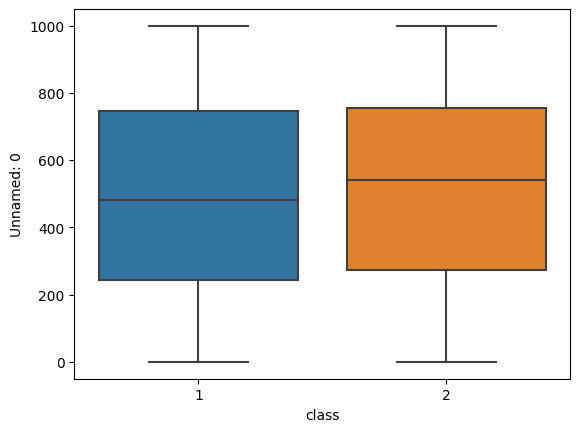

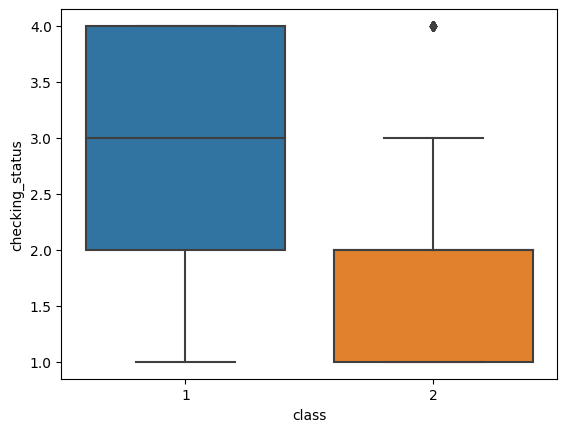

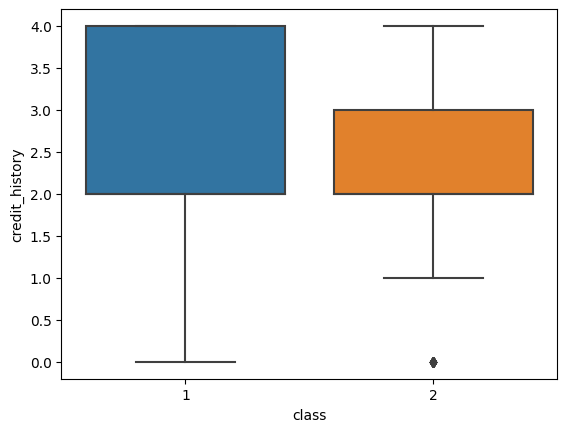

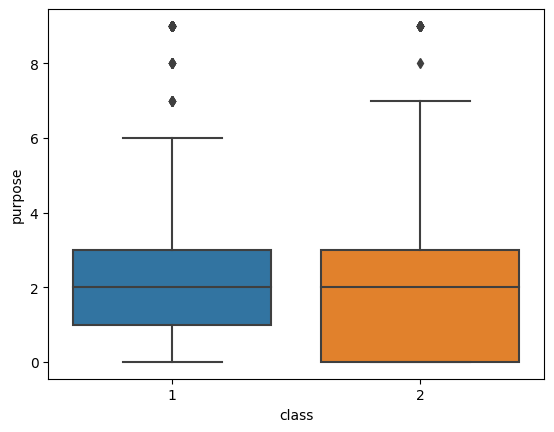

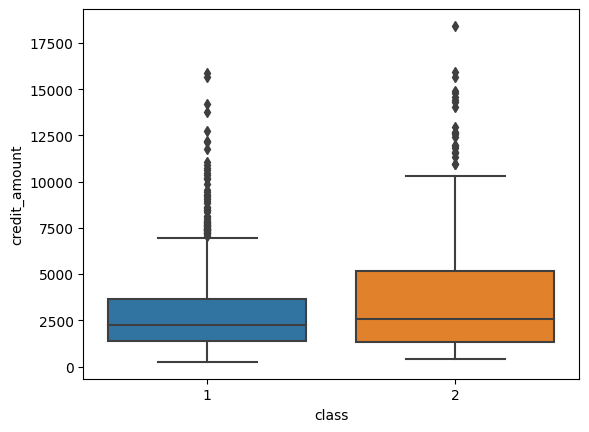

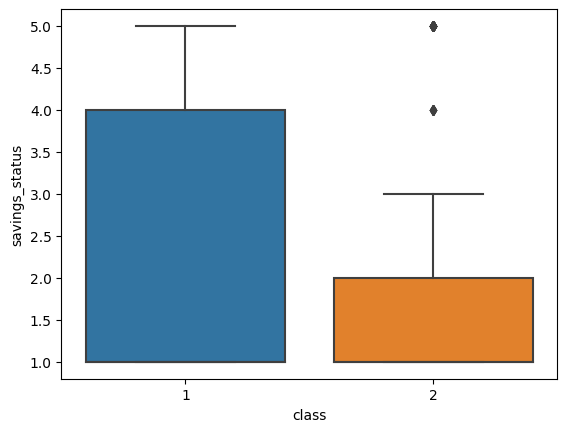

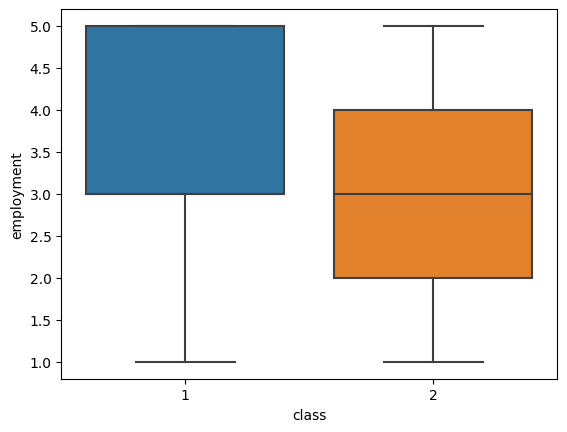

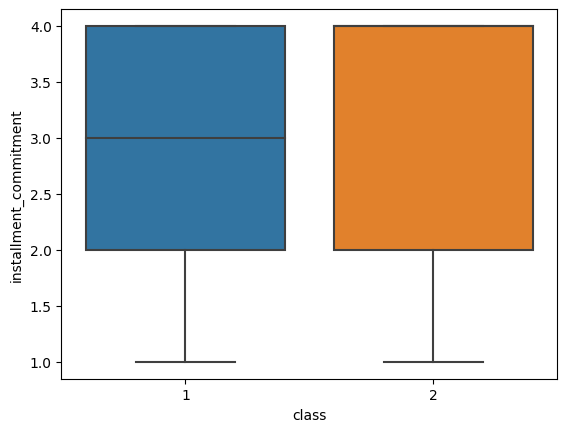

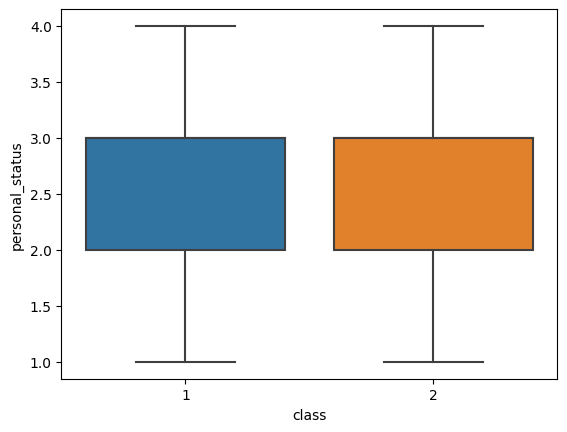

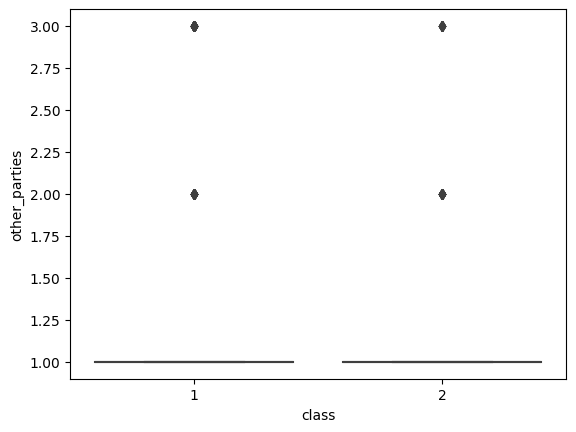

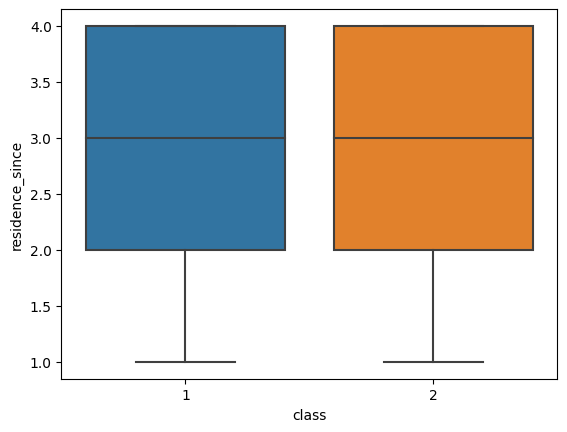

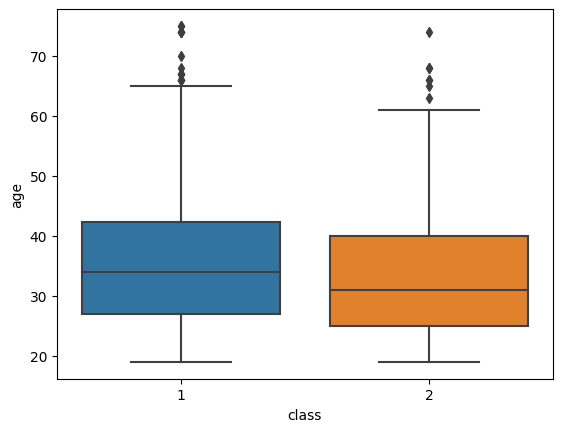

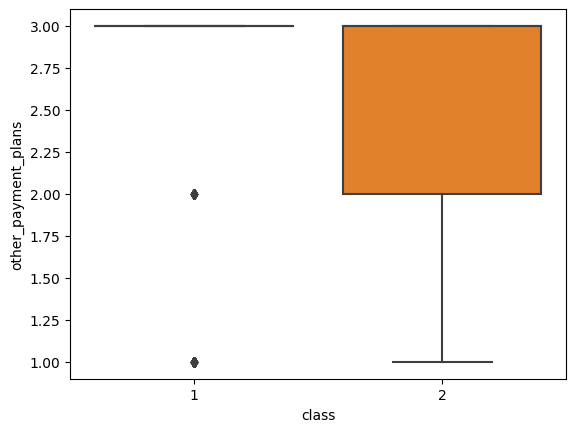

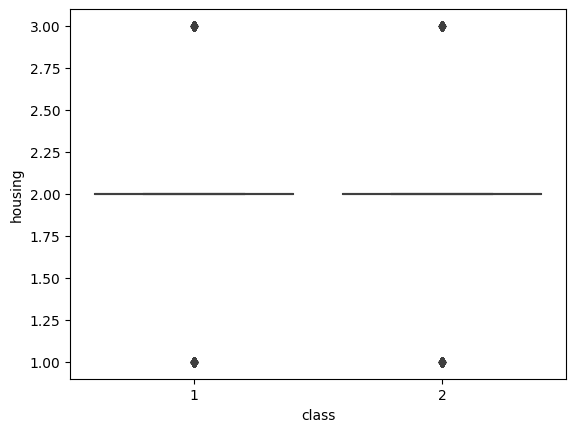

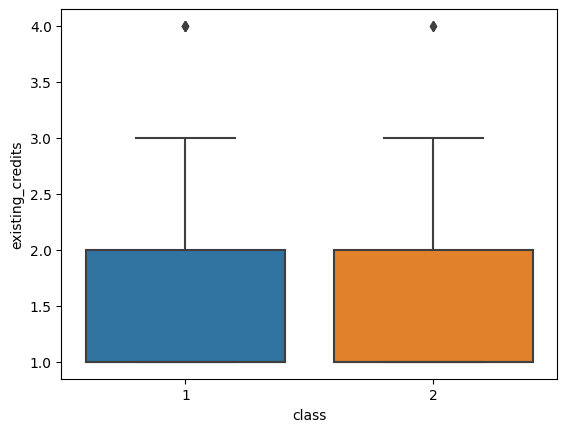

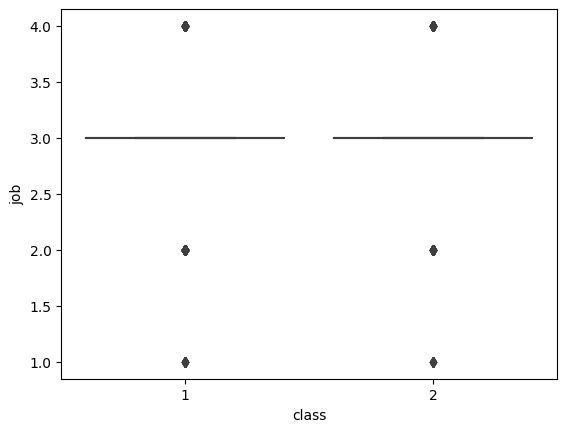

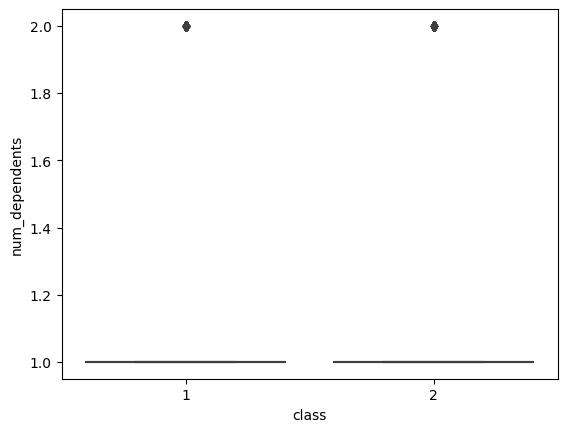

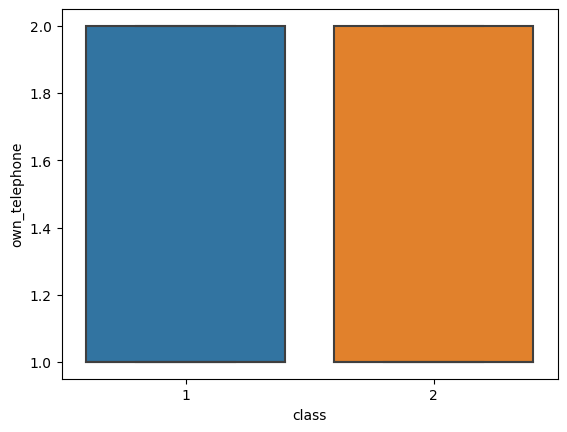

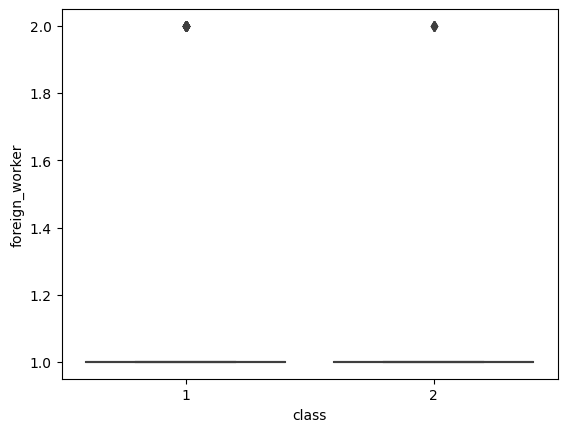

In [ ]:
# Enable inline plotting for graphics
%matplotlib inline

# generate boxplots of each feature against the target class
for c, v in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, x=df["class"], y=df[v])
    fname = f"pairplot{c}.pdf"
    plt.savefig(fname)
    plt.show() 


In [ ]:
# Separate the features and the target from the dataframe
X = df.drop(['class'], axis = 1)
y = df["class"].values

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)
# Predicting the model
pred_logit= logit.predict(X_test)

In [ ]:
# Import the necessary evaluation metrics from the sklearn library
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

# Print the accuracy of the logistic regression model. 
print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))

# Print the classification report for the logistic regression model. 
print(classification_report(y_test, pred_logit))


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\30694\anaconda3\New folder\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
# Import necessary functions
from sklearn.model_selection import cross_val_score, KFold

# Perform cross-validation on the logistic regression model
# using K-Fold strategy (4 splits, shuffled, with a fixed random state)
score = cross_val_score(logit, X, y, cv=KFold(n_splits=4, shuffle=True, random_state=42))

# Get the mean score of the model's performance
score.mean()



0.752

In [ ]:
results = []
# Get the predicted probabilities
pred_proba = logit.predict_proba(X_test)

# Define your thresholds
thresholds = np.arange(0.1, 0.9, 0.1)

for threshold in thresholds:
    # Apply the threshold to the probabilities
    pred = (pred_proba[:, 1] >= threshold).astype('int') + 1
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    accuracy = accuracy_score(y_test, pred)
    recall = tp / (tp + fn)  # Calculate the recall
    specificity = tn / (tn + fp)  # Calculate the specificity
    precision = tp / (tp + fp)  # Calculate the precision
    f1_score = 2 * (precision * recall) / (precision +
                                           recall)  # Calculate the F1-score
    # Print the metrics for this threshold
    results.append({'Threshold': round(threshold, 2),
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'Specificity': specificity,
                    'F1-score': f1_score})

# Create the results DataFrame
results_df = pd.DataFrame(results)

# Set the "Threshold" column as the index
results_df = results_df.set_index("Threshold")

# Print the results DataFrame
results_df


,Accuracy,Precision,Recall,Specificity,F1-score
Threshold,,,,,
0.1,0.440,0.339394,0.949153,0.226950,0.500000
0.2,0.630,0.436975,0.881356,0.524823,0.584270
0.3,0.715,0.510870,0.796610,0.680851,0.622517
0.4,0.750,0.569231,0.627119,0.801418,0.596774
0.5,0.770,0.651163,0.474576,0.893617,0.549020
0.6,0.755,0.708333,0.288136,0.950355,0.409639
0.7,0.750,0.846154,0.186441,0.985816,0.305556
0.8,0.725,1.000000,0.067797,1.000000,0.126984


In [ ]:
# Transpose the dataframe 'results_df'
results_df = results_df.T

In [ ]:
# Print as a LaTeX table
print(results_df.to_latex(index=True, float_format="%.3f"))
print(results_df.to_latex(index=True, float_format="%.3f"))

\begin{tabular}{lrrrrrrrr}
\toprule
Threshold &   0.1 &   0.2 &   0.3 &   0.4 &   0.5 &   0.6 &   0.7 &   0.8 \\
\midrule
Accuracy    & 0.440 & 0.630 & 0.715 & 0.750 & 0.770 & 0.755 & 0.750 & 0.725 \\
Precision   & 0.339 & 0.437 & 0.511 & 0.569 & 0.651 & 0.708 & 0.846 & 1.000 \\
Recall      & 0.949 & 0.881 & 0.797 & 0.627 & 0.475 & 0.288 & 0.186 & 0.068 \\
Specificity & 0.227 & 0.525 & 0.681 & 0.801 & 0.894 & 0.950 & 0.986 & 1.000 \\
F1-score    & 0.500 & 0.584 & 0.623 & 0.597 & 0.549 & 0.410 & 0.306 & 0.127 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrrr}
\toprule
Threshold &   0.1 &   0.2 &   0.3 &   0.4 &   0.5 &   0.6 &   0.7 &   0.8 \\
\midrule
Accuracy    & 0.440 & 0.630 & 0.715 & 0.750 & 0.770 & 0.755 & 0.750 & 0.725 \\
Precision   & 0.339 & 0.437 & 0.511 & 0.569 & 0.651 & 0.708 & 0.846 & 1.000 \\
Recall      & 0.949 & 0.881 & 0.797 & 0.627 & 0.475 & 0.288 & 0.186 & 0.068 \\
Specificity & 0.227 & 0.525 & 0.681 & 0.801 & 0.894 & 0.950 & 0.986 & 1.000 \\
F1-score    & 0.50

C:\Users\30694\AppData\Local\Temp\ipykernel_3316\2608966898.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.to_latex(index=True, float_format="%.3f"))
C:\Users\30694\AppData\Local\Temp\ipykernel_3316\2608966898.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.to_latex(index=True, float_format="%.3f"))
